In [1]:
import os
import pandas as pd
from fredapi import Fred
import yaml

In [2]:
root_dir = os.path.dirname(os.getcwd())
key_yaml = os.path.join(root_dir, 'config', 'api_keys.yaml')
with open(key_yaml, 'r') as file:
    keys = yaml.safe_load(file)['keys']

In [3]:
fred = Fred(api_key=keys['fred'])
data = fred.get_series_all_releases('GDP')
fred.get_series_info("GDP")

id                                                                         GDP
realtime_start                                                      2024-12-19
realtime_end                                                        2024-12-19
title                                                   Gross Domestic Product
observation_start                                                   1947-01-01
observation_end                                                     2024-07-01
frequency                                                            Quarterly
frequency_short                                                              Q
units                                                      Billions of Dollars
units_short                                                          Bil. of $
seasonal_adjustment                            Seasonally Adjusted Annual Rate
seasonal_adjustment_short                                                 SAAR
last_updated                                        

In [4]:
data.dropna(inplace=True)
data['date'] = pd.to_datetime(data['date'])
data['realtime_start'] = pd.to_datetime(data['realtime_start'])
data = data.rename({'value':'GDP'}, axis=1)
data['GDP'] = data['GDP'].astype(float)

<Axes: xlabel='date'>

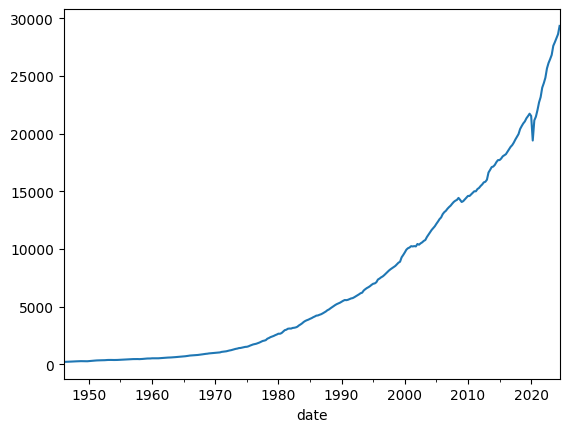

In [5]:
data.drop_duplicates('date').set_index("date")['GDP'].plot()